In [4]:
import pandas as pd
weather = pd.read_csv("weather.csv", index_col="DATE")
# weather
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
valid_columns = weather.columns[null_pct < .05]
weather = weather[valid_columns].copy()
weather.columns = weather.columns.str.lower()
weather = weather.ffill()
weather.index = pd.to_datetime(weather.index)

weather["target"] = weather.shift(-1) ["tmax"]

weather = weather.ffill()

from sklearn.linear_model import Ridge
print(weather.corr(numeric_only=True))
rr=Ridge(alpha=.1)
predictor=weather.columns[~weather.columns.isin(["target","name","station"])]
# print(predictor)


def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]

        model.fit(train[predictors], train["target"])

        preds = model.predict(test[predictors])

        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)

        combined.columns = ["actual", "prediction"]

        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

        all_predictions.append(combined)
    return pd.concat(all_predictions)
predictions = backtest(weather, rr, predictor)
# print(predictions)

from sklearn.metrics import mean_absolute_error

# mean_absolute_error(predictions["actual"], predictions["prediction"])\




            prcp      snow      snwd      tmax      tmin    target
prcp    1.000000  0.151051  0.001178 -0.007210  0.052279 -0.003358
snow    0.151051  1.000000  0.232567 -0.175075 -0.159285 -0.172737
snwd    0.001178  0.232567  1.000000 -0.259858 -0.256977 -0.241054
tmax   -0.007210 -0.175075 -0.259858  1.000000  0.955487  0.915296
tmin    0.052279 -0.159285 -0.256977  0.955487  1.000000  0.915461
target -0.003358 -0.172737 -0.241054  0.915296  0.915461  1.000000


np.float64(5.13932667966084)

In [8]:
def pct_diff(old, new):
    return (new-old) / old
def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"

    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather

rolling_horizons = [3,140]

for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)
# weather
weather = weather.iloc[14:,:]
# weather
weather = weather.fillna(0)
def expand_mean(df):
    return df.expanding(1).mean()
for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean) 
# weather    

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10996\1779472955.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather[label] = weather[col].rolling(horizon).mean()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10996\1779472955.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])


,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_140_tmin,rolling_140_tmin_pct,rolling_140_prcp,rolling_140_prcp_pct,month_avg_tmax,day_avgtmax,month_avg_tmin,day_avgtmin,month_avg_prcp,day_avgprcp
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-29,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,49,40,47.0,41.666667,0.176000,...,0.000000,0.000000,0.000000,0.00000,49.000000,49.000000,40.000000,40.000000,0.000000,0.000000
1970-01-30,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,24,36.0,45.333333,0.036765,...,0.000000,0.000000,0.000000,0.00000,48.000000,47.000000,32.000000,24.000000,0.000000,0.000000
1970-01-31,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,36,22,48.0,44.000000,-0.181818,...,0.000000,0.000000,0.000000,0.00000,44.000000,36.000000,28.666667,22.000000,0.000000,0.000000
1970-02-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,48,34,49.0,43.666667,0.099237,...,0.000000,0.000000,0.000000,0.00000,48.000000,48.000000,34.000000,34.000000,0.000000,0.000000
1970-02-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.11,0.0,0.0,49,36,50.0,44.333333,0.105263,...,0.000000,0.000000,0.000000,0.00000,48.500000,49.000000,35.000000,36.000000,0.055000,0.110000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0,67.000000,0.000000,...,65.028571,-0.169596,0.087000,-0.08046,64.843462,63.490566,50.225905,48.962264,0.115316,0.114151
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0,63.666667,-0.089005,...,64.921429,-0.260645,0.087000,-1.00000,64.839264,63.962264,50.224540,48.943396,0.115245,0.077170
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0,60.333333,-0.071823,...,64.807143,-0.336493,0.077286,-1.00000,64.833844,62.056604,50.220110,48.132075,0.115175,0.117547


<Axes: xlabel='diff'>

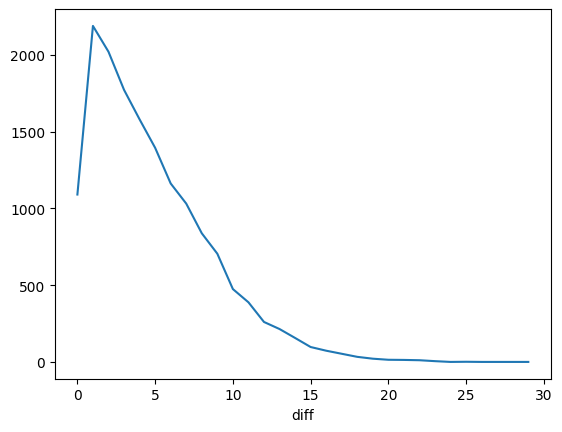

In [15]:
predictor = weather.columns[~weather.columns.isin(["target","name","station"])]
# predictor
predictions = backtest(weather, rr, predictor)
mean_absolute_error(predictions["actual"], predictions["prediction"])
# predictions.sort_values("diff", ascending=False)
# weather.loc["1990-03-07" : "1990-03-17"]
# predictions["diff"].round().value_counts()
predictions["diff"].round().value_counts().sort_index().plot()
